# Web of Science - Fighting words analysis

#### Load wos_econ, wos_soc

In [1]:
import sys
sys.path.append("./../helper") # find scripts
maxInt = sys.maxsize

from common_imports import *
from helpers import *

from load_data import wos_soc, wos_econ   # load data

import convokit
from convokit import FightingWords
from convokit import Corpus, Utterance, Speaker

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Loading articles...
73513 econ articles loaded
190778 soc articles loaded


#### Load top words in soc and econ

In [2]:
def topTerms(dat, topN):
    
    # Get topN terms  
    terms = dat.items('t') # all terms
    cdict = {t: dat(t=t) for t in terms} # term/count dictionary
    
    top_terms = sorted(terms, key=lambda x:cdict[x])[-topN: ] # sort dicitonary by counts and return terms
    
    return(top_terms)

cc_soc_single = counter('wos-soc-alltitles-singlecounts')
cc_econ_single = counter('wos-econ-alltitles-singlecounts')

top_soc = topTerms(cc_soc_single, 1000) # get top X words
top_econ = topTerms(cc_econ_single, 1000) 

Loading wos-soc-alltitles-singlecounts from disk...
Loading wos-econ-alltitles-singlecounts from disk...


#### Load words that appear both in soc and econ

In [3]:
with open('intersection_socecon.txt') as f:
    terms = f.readlines()
    
terms = set([term.strip() for term in terms])

### Reduce combined data to words that appear both in sociology and economics and belong to 

In [4]:
soc = [article for article in wos_soc if len(terms.intersection( set( article['title'].split() ) ) )]
econ = [article for article in wos_econ if len(terms.intersection( set( article['title'].split() ) ) )]

In [18]:
soc2=soc
for article in soc2:
    article["title"] = set(article['title']).intersection( set( top_soc ) ) 
# CONTINUE HERE


{'id': 73520,
 'discipline': 'soc',
 'title': set(),
 'author': 'K?ihk?, I',
 'year': '2020',
 'journal': 'ETHNOGRAPHY',
 'subjects': 'Anthropology; Sociology'}

### Fighting words analysis

In [4]:
utterances = []
for article in wos:
    utterances.append(
        Utterance(id=str(article['id']), conversation_id=str(article['id']), text=article['title'], speaker=Speaker(id=str(article['author'])), meta={'discipline': article['discipline']})
    )
corpus = Corpus(utterances=utterances)

In [12]:
corpus.get_utterance('1')

Utterance({'obj_type': 'utterance', 'meta': {'discipline': 'econ'}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x0000020752C36970>, 'id': "['ENGLE, RF', 'GRANGER, CWJ']"}), 'conversation_id': '1', 'reply_to': None, 'timestamp': None, 'text': 'COINTEGRATION ERROR CORRECTION REPRESENTATION ESTIMATION TESTING', 'owner': <convokit.model.corpus.Corpus object at 0x0000020752C36970>, 'id': '1'})

In [5]:
fw = FightingWords(ngram_range=(1,1))

Initializing default CountVectorizer with ngram_range (1, 1)... Done.


In [6]:
fw.fit(corpus, class1_func=lambda utt: utt.meta['discipline'] == 'soc',
               class2_func=lambda utt: utt.meta['discipline'] == 'econ')

class1_func returned 190778 valid corpus components. class2_func returned 73513 valid corpus components.


MemoryError: Unable to allocate 27.2 GiB for an array with shape (264291, 13790) and data type int64

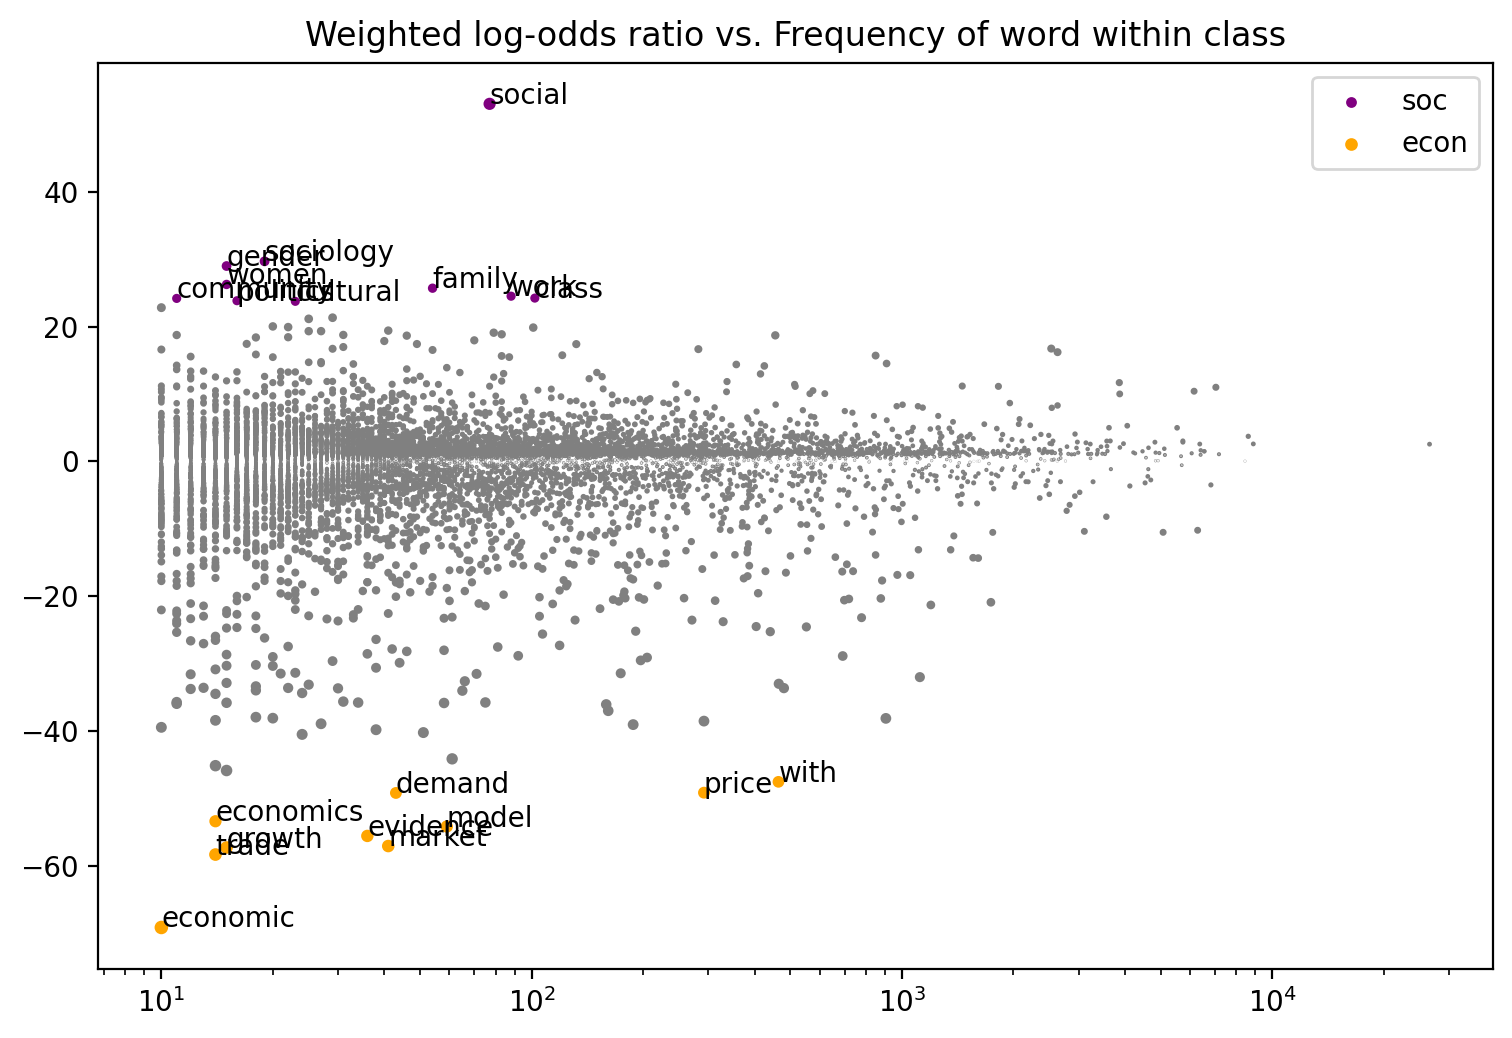

In [15]:
df = fw.summarize(corpus, plot=True, class1_name='soc', class2_name='econ')

In [97]:
df[df['z-score'].between(-2, 2)]

,z-score,class
ngram,,
departure,-1.998049,econ
petty,-1.998049,econ
lobbying,-1.995848,econ
mitigation,-1.995800,econ
ships,-1.988583,econ
...,...,...
conclusions,1.994574,soc
connectedness,1.994574,soc
authenticity,1.996225,soc


In [16]:
fw.get_zscore("inequality")
fw.get_zscore("education")
fw.get_zscore("race")
fw.get_zscore("norms")
fw.get_zscore("behavior")
fw.get_zscore("inequity")

5.312108137892475

16.52606524685482

21.143075005271754

7.264650206106834

-17.21449666496535

0.1741046200065999

In [94]:
fw.get_top_k_ngrams(15)

(['social',
  'sociology',
  'gender',
  'women',
  'family',
  'work',
  'class',
  'community',
  'politics',
  'cultural',
  'health',
  'culture',
  'race',
  'children',
  'society'],
 ['economic',
  'trade',
  'growth',
  'market',
  'evidence',
  'model',
  'economics',
  'demand',
  'price',
  'with',
  'industry',
  'models',
  'investment',
  'cost',
  'rate'])

### Next steps

Do the fightig word analysis over time for specific terms